In [52]:
import pandas as pd
import numpy as np
from random import sample
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
import plotly.graph_objects as go
#from pandas import DataFrame as df
from sklearn.linear_model import LinearRegression

In [53]:
bucket='covid-death'

file_key = 'covid-19-world-cases-deaths-testing.csv'

s3uri = 's3://{}/{}'.format(bucket, file_key)

df = pd.read_csv(s3uri)



# # Description of index, entries, columns, data types, memory info


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132644 entries, 0 to 132643
Data columns (total 65 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   iso_code                                 132644 non-null  object 
 1   continent                                124170 non-null  object 
 2   location                                 132644 non-null  object 
 3   date                                     132644 non-null  object 
 4   total_cases                              125410 non-null  float64
 5   new_cases                                125408 non-null  float64
 6   new_cases_smoothed                       124365 non-null  float64
 7   total_deaths                             114293 non-null  float64
 8   new_deaths                               114489 non-null  float64
 9   new_deaths_smoothed                      124365 non-null  float64
 10  total_cases_per_million         

In [55]:
df.shape 

(132644, 65)

In [56]:
# number of unique values of a column
df["location"].nunique()
# show unique values of a column
df["date"].unique()
# number of unique values alltogether
df.columns.nunique()
# value counts
df['total_cases'].value_counts()

1.0           1243
4.0            758
3.0            620
2.0            612
721.0          596
              ... 
341879.0         1
135441.0         1
3783597.0        1
85469.0          1
10377818.0       1
Name: total_cases, Length: 73232, dtype: int64

In [57]:
df.sample()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
90924,OMN,Asia,Oman,2021-01-25,133253.0,209.0,177.429,1522.0,1.0,1.143,...,0.5,15.6,97.4,1.6,77.86,0.813,NaN,NaN,NaN,NaN


## Basic functions to inspect the data

In [58]:
df.isnull().sum()


iso_code                                        0
continent                                    8474
location                                        0
date                                            0
total_cases                                  7234
                                            ...  
human_development_index                     17873
excess_mortality_cumulative_absolute       127988
excess_mortality_cumulative                127988
excess_mortality                           127988
excess_mortality_cumulative_per_million    127988
Length: 65, dtype: int64

In [59]:
df["total_cases"] = df["total_cases"].fillna(df["total_cases"].mean())
df["total_tests"] = df["total_tests"].fillna(df["total_tests"].mean())
df["new_deaths"] = df["new_deaths"].fillna(df["new_deaths"].mean())
df["positive_rate"] = df["positive_rate"].fillna(df["positive_rate"].mean())
df["people_vaccinated"] = df["people_vaccinated"].fillna(df["people_vaccinated"].mean())
df["people_fully_vaccinated"] = df["people_fully_vaccinated"].fillna(df["people_fully_vaccinated"].mean())
df["population_density"] = df["population_density"].fillna(df["population_density"].mean())
df["total_vaccinations"] = df["total_vaccinations"].fillna(df["total_vaccinations"].mean())


In [60]:
df.isnull().sum()


iso_code                                        0
continent                                    8474
location                                        0
date                                            0
total_cases                                     0
                                            ...  
human_development_index                     17873
excess_mortality_cumulative_absolute       127988
excess_mortality_cumulative                127988
excess_mortality                           127988
excess_mortality_cumulative_per_million    127988
Length: 65, dtype: int64

In [61]:
##training
df['new_deaths'].isnull().sum()
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,184.004114,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,184.004114,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,184.004114,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,184.004114,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,184.004114,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132639,ZWE,Africa,Zimbabwe,2021-11-07,133187.0,19.0,30.000,4685.0,0.000000,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
132640,ZWE,Africa,Zimbabwe,2021-11-08,133205.0,18.0,28.286,4690.0,5.000000,1.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
132641,ZWE,Africa,Zimbabwe,2021-11-09,133242.0,37.0,27.857,4691.0,1.000000,1.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
132642,ZWE,Africa,Zimbabwe,2021-11-10,133302.0,60.0,30.143,4694.0,3.000000,1.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [62]:
x = df[['total_cases','total_tests','positive_rate','people_vaccinated','people_fully_vaccinated','population_density','total_vaccinations']]
y = df['new_deaths']
x.head()

,total_cases,total_tests,positive_rate,people_vaccinated,people_fully_vaccinated,population_density,total_vaccinations
0,5.0,1.190922e+07,0.086493,5.854553e+07,4.009685e+07,54.422,1.074031e+08
1,5.0,1.190922e+07,0.086493,5.854553e+07,4.009685e+07,54.422,1.074031e+08
2,5.0,1.190922e+07,0.086493,5.854553e+07,4.009685e+07,54.422,1.074031e+08
3,5.0,1.190922e+07,0.086493,5.854553e+07,4.009685e+07,54.422,1.074031e+08
4,5.0,1.190922e+07,0.086493,5.854553e+07,4.009685e+07,54.422,1.074031e+08


In [63]:
# Split into test and training sets
test_size = 0.33
seed = 7
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=test_size, random_state=seed)

In [64]:
x_train


,total_cases,total_tests,positive_rate,people_vaccinated,people_fully_vaccinated,population_density,total_vaccinations
84631,7.740090e+05,5.179331e+06,0.132000,5.854553e+07,4.009685e+07,508.544000,1.074031e+08
126349,5.361017e+07,1.190922e+07,0.086493,8.123186e+08,9.841983e+07,399.292664,1.189528e+09
12044,1.489810e+05,3.663909e+06,0.110000,5.854553e+07,4.009685e+07,375.564000,1.074031e+08
54584,6.549373e+06,7.785040e+07,0.073000,5.854553e+07,4.009685e+07,450.419000,1.074031e+08
106889,2.038988e+06,1.190922e+07,0.086493,5.854553e+07,4.009685e+07,1209.088000,1.074031e+08
...,...,...,...,...,...,...,...
66455,2.859000e+03,1.190922e+07,0.086493,5.854553e+07,4.009685e+07,594.561000,1.074031e+08
53459,4.461780e+05,3.299071e+06,0.184000,8.629530e+05,2.797270e+05,108.043000,1.142680e+06
10742,1.790000e+02,1.190922e+07,0.086493,5.854553e+07,4.009685e+07,664.463000,1.074031e+08
49689,3.156000e+03,1.190922e+07,0.086493,5.854553e+07,4.009685e+07,66.191000,1.074031e+08


In [65]:
x_test 

,total_cases,total_tests,positive_rate,people_vaccinated,people_fully_vaccinated,population_density,total_vaccinations
114107,2.316900e+04,1.190922e+07,0.086493,1.675600e+05,4.066700e+04,3.612000,2.082270e+05
13220,2.242000e+03,1.190922e+07,0.086493,5.854553e+07,4.009685e+07,99.110000,1.074031e+08
61815,8.460330e+05,1.061067e+07,0.044000,3.856293e+06,3.450344e+06,109.285000,7.306637e+06
14107,1.130000e+02,5.707400e+04,0.003000,5.854553e+07,4.009685e+07,21.188000,1.074031e+08
81452,4.790710e+05,5.059147e+06,0.046000,5.854553e+07,4.009685e+07,80.080000,1.904169e+06
...,...,...,...,...,...,...,...
122046,2.038988e+06,1.190922e+07,0.086493,5.854553e+07,4.009685e+07,12.253000,1.074031e+08
88174,3.648289e+07,1.190922e+07,0.086493,1.584546e+08,9.441081e+07,399.292664,2.472828e+08
97484,2.144630e+05,1.985181e+06,0.086493,1.261828e+06,9.289790e+05,227.322000,2.190807e+06
74917,8.160000e+03,1.190922e+07,0.086493,5.854553e+07,4.009685e+07,15.196000,1.074031e+08


In [66]:
y_train


84631       28.000000
126349    3226.000000
12044       25.000000
54584      940.000000
106889     184.004114
             ...     
66455        0.000000
53459      152.000000
10742        0.000000
49689        0.000000
61615       71.000000
Name: new_deaths, Length: 88871, dtype: float64

In [67]:
y_test

114107       5.000000
13220        0.000000
61815        0.000000
14107      184.004114
81452       13.000000
             ...     
122046     184.004114
88174     1462.000000
97484        1.000000
74917        2.000000
33482       12.000000
Name: new_deaths, Length: 43773, dtype: float64

In [68]:
# Create Regression Model
# Use Linear Regression Model to train our data
model = LinearRegression()

In [69]:
# Train the model
model.fit(x_train, y_train)

LinearRegression()

In [70]:
# Use model to make predictions
y_pred = model.predict(x_test)

In [71]:
y_pred


array([186.03112879,  19.5717323 , 226.91491412, ..., 216.99784001,
        20.23856942, 130.80732136])

In [72]:
model.score(x_test, y_test)


0.6667080997357822

In [73]:
# Result
# create new data frame
new_df = x_test.copy()

In [74]:
new_df['Actual_New_Death'] = y_test
new_df['Predicted_New_Death'] = y_pred
new_df['continent'] = df['continent']
new_df['Date'] = df['date']
new_df['Male_smokers'] = df['male_smokers']
new_df['Female_smokers'] = df['female_smokers']
new_df


,total_cases,total_tests,positive_rate,people_vaccinated,people_fully_vaccinated,population_density,total_vaccinations,Actual_New_Death,Predicted_New_Death,continent,Date,Male_smokers,Female_smokers
114107,2.316900e+04,1.190922e+07,0.086493,1.675600e+05,4.066700e+04,3.612000,2.082270e+05,5.000000,186.031129,South America,2021-07-09,42.9,7.4
13220,2.242000e+03,1.190922e+07,0.086493,5.854553e+07,4.009685e+07,99.110000,1.074031e+08,0.000000,19.571732,Africa,2020-09-10,12.3,0.6
61815,8.460330e+05,1.061067e+07,0.044000,3.856293e+06,3.450344e+06,109.285000,7.306637e+06,0.000000,226.914914,Asia,2021-10-21,NaN,NaN
14107,1.130000e+02,5.707400e+04,0.003000,5.854553e+07,4.009685e+07,21.188000,1.074031e+08,184.004114,10.859422,Asia,2020-08-12,NaN,NaN
81452,4.790710e+05,5.059147e+06,0.046000,5.854553e+07,4.009685e+07,80.080000,1.904169e+06,13.000000,25.361097,Africa,2021-02-16,47.1,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122046,2.038988e+06,1.190922e+07,0.086493,5.854553e+07,4.009685e+07,12.253000,1.074031e+08,184.004114,185.469066,Asia,2021-04-21,NaN,NaN
88174,3.648289e+07,1.190922e+07,0.086493,1.584546e+08,9.441081e+07,399.292664,2.472828e+08,1462.000000,2723.212626,NaN,2021-04-15,NaN,NaN
97484,2.144630e+05,1.985181e+06,0.086493,1.261828e+06,9.289790e+05,227.322000,2.190807e+06,1.000000,216.997840,Asia,2021-05-20,26.9,0.8
74917,8.160000e+03,1.190922e+07,0.086493,5.854553e+07,4.009685e+07,15.196000,1.074031e+08,2.000000,20.238569,Africa,2021-02-06,23.0,1.6


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<AxesSubplot:xlabel='continent'>

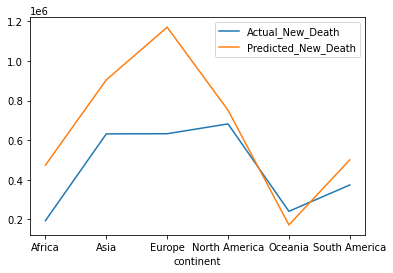

In [78]:
new_df.groupby('continent')['Actual_New_Death', 'Predicted_New_Death'].sum().plot(kind = 'line')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<AxesSubplot:xlabel='Date'>

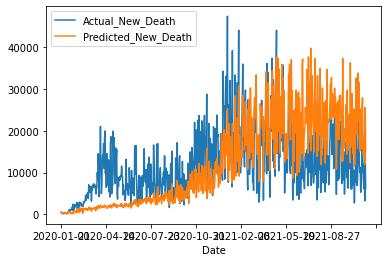

In [75]:
new_df.groupby('Date')['Actual_New_Death', 'Predicted_New_Death'].sum().plot(kind = 'line')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<AxesSubplot:xlabel='Female_smokers'>

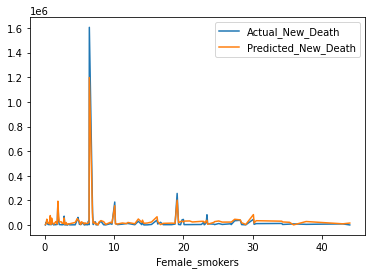

In [76]:
new_df.groupby('Female_smokers')['Actual_New_Death', 'Predicted_New_Death'].sum().plot(kind = 'line')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<AxesSubplot:xlabel='Male_smokers'>

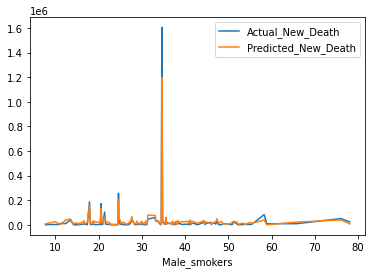

In [77]:
new_df.groupby('Male_smokers')['Actual_New_Death', 'Predicted_New_Death'].sum().plot(kind = 'line')